In [1]:
import logging
import os
import sys
import gym
import matplotlib.pyplot as plt
from gym.envs.mujoco.humanoid import HumanoidEnv
import pybullet

In [2]:
#Relative import trick
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.init_qpos_modifer import InitQposModifierFactory, InitQposModifier

In [4]:
def history_of_state_at_index_with_random_actions(env: gym.Env, index: int):
    assert isinstance(index, int), "Index must be an integer"
    assert hasattr(env, 'step') and hasattr(env, 'reset'), "Env must have reset and step methods"
    
    history = []
    done = False
    
    observation = env.reset()
    history.append(observation[index])
    print(f"Initial state[{index}]={observation[index]}")
    while not done:
        observation, reward, done, info = env.step(env.action_space.sample())
        history.append(observation[index])
    
    
    return history

In [5]:
FORMAT = '%(asctime)s: %(message)s'
logging.basicConfig(format=FORMAT, stream=sys.stdout, level=logging.INFO)

In [6]:
class ParametrizableResetHumanoid(HumanoidEnv):
    def __init__(self):
        super().__init__()

        qpos_modifier = InitQposModifierFactory.get_default()
        logging.info(f"Modifying Humanoid init_qpot using {qpos_modifier}")
        self.init_qpos = qpos_modifier.modify_init_qpos(self.init_qpos)

In [7]:
class ForwardTiltQposModifier(InitQposModifier):
    def modify_init_qpos(self, init_qpos):
        index = 5
        value = 0.1 # slight forward tilt
        
        init_qpos[index] = value  # default is 0
        logging.info(f"init_qpos[{index}] = {value}")
        return init_qpos

In [8]:
class XAxisTiltQposModifier(InitQposModifier):
    def modify_init_qpos(self, init_qpos):
        index = 6
        value = 0.1 # slight tilt to the right in relation to x-axis
        
        init_qpos[index] = value  # default is 0
        logging.info(f"init_qpos[{index}] = {value}")
        return init_qpos

In [9]:
class LegsRotationQposModifier(InitQposModifier):
    def modify_init_qpos(self, init_qpos):
        index = 7
        value = 0.1 # slight legs rotation to the right
        
        init_qpos[index] = value  # default is 0
        logging.info(f"init_qpos[{index}] = {value}")
        return init_qpos

In [10]:
class HeightQposModifier(InitQposModifier):
    def modify_init_qpos(self, init_qpos):
        index = 0
        value = 1.5 
        
        init_qpos[index] = value  # default is 1.4
        logging.info(f"init_qpos[{index}] = {value}")
        return init_qpos

In [11]:
new_env_name = 'ParametrizableResetHumanoid-v2'

gym.envs.register(
    id=new_env_name,
    entry_point=ParametrizableResetHumanoid,
    max_episode_steps=1000,
)
logging.info(f"Registered new environment: {new_env_name}")

2022-04-30 09:10:38,919: Registered new environment: ParametrizableResetHumanoid-v2


In [12]:
forward_tilt_InitQposModifier = "forward_tilt"
InitQposModifierFactory.register(forward_tilt_InitQposModifier, ForwardTiltQposModifier)

In [13]:
x_axis_InitQposModifier = "x_axis_rotation"
InitQposModifierFactory.register(x_axis_InitQposModifier, XAxisTiltQposModifier)

In [14]:
legs_roatation_InitQposModifier = "legs_rotation"
InitQposModifierFactory.register(legs_roatation_InitQposModifier, LegsRotationQposModifier)

In [15]:
height_InitQposModifier = "height"
InitQposModifierFactory.register(height_InitQposModifier, HeightQposModifier)

In [16]:
HEIGHT_INDEX = 0
TILT_INDEX = 3  # In qpos its under index 5, but observation cuts first two elements
X_AXIS_ROTATION_INDEX = 4  # In qpos its under index 6, but observation cuts first two elementsx

2022-04-30 09:10:38,950: Set env variable DEFAULT_InitQposModifier=x_axis_rotation
2022-04-30 09:10:38,962: Modifying Humanoid init_qpot using <__main__.XAxisTiltQposModifier object at 0x7f9f543e3ed0>
2022-04-30 09:10:38,962: init_qpos[6] = 0.1
Initial state[4]=0.08955158208358076


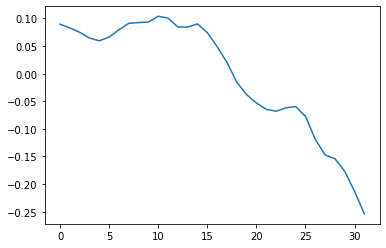

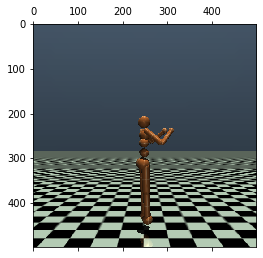

In [17]:
used_InitQposModifier = x_axis_InitQposModifier # Change this variable to change used InitQposModifier

os.environ["DEFAULT_InitQposModifier"] = used_InitQposModifier
logging.info(f"Set env variable DEFAULT_InitQposModifier={used_InitQposModifier}")

test_env = gym.make(new_env_name)

plt.plot(history_of_state_at_index_with_random_actions(test_env, X_AXIS_ROTATION_INDEX))

test_env.reset()
first_frame = test_env.render(mode='rgb_array')
plt.matshow(first_frame)

In [18]:
import pybullet_envs


In [19]:
pybullet_humanoid_env = gym.make("HumanoidBulletEnv-v0")

/acerac-venv/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [20]:
observation = pybullet_humanoid_env.reset()

In [21]:
print(len(observation))

44


Initial state[0]=0.5999999642372131


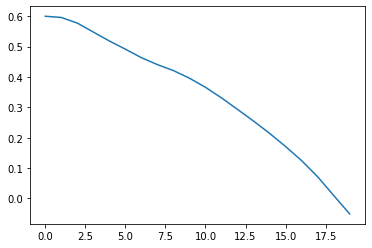

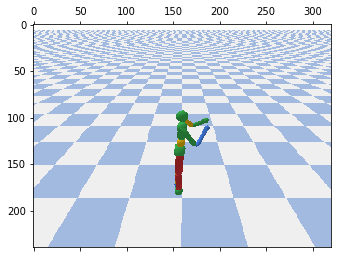

In [22]:
plt.plot(history_of_state_at_index_with_random_actions(pybullet_humanoid_env, 0))

pybullet_humanoid_env.reset()
first_frame = pybullet_humanoid_env.render(mode='rgb_array')
plt.matshow(first_frame)